<h1>Task 1</h1>
<P>In this Task we are going to fix the spelling mistakes using several fuzzy matching algorithms.</p>

<p>Importing Libraries and Creating a DataFrame by the Reading csv </p> 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

occupations = ['doctor','lawyer','teacher','engineer','accountant','nurse','police','architect','dentist','phramacist']

data = pd.read_excel("TaskData.xlsx")                         #Creating A DataFrame For Storing Data
data.loc[len(data.index)] = [data.columns[0]]
data = data.rename(columns={data.columns[0]:"INP"})

<p>Defining Functions for Cosine similarity and Jaccard similarity<br>
These Functions Return Similarity of the words in between 0 and 1.</p>

In [3]:
def cosine_similarity(word1,word2):       #Function to Return Consine Similarity Between Two Words
    word1 = word1.lower()              #Changing All the Characters to LowerCase
    word2 = word2.lower()

    chars = []                         #Creating A List of All Distinct Characters
    for i in word1:
        chars.append(i)

    for i in word2:
        if i not in chars:
            chars.append(i)

    table = []                          #A 2D List for Count Of Every Distinct Character
    table.append(chars)
    word1_count = []
    word2_count = []

    for i in chars:
        word1_count.append(word1.count(i)) 
        word2_count.append(word2.count(i)) 

    table.append(word1_count)
    table.append(word2_count)

    num = 0                               #Applying Cosine Silarity Formula
    deno1 = 0
    deno2 = 0
    for i in range(len(chars)):
        num += table[1][i] * table[2][i]
        deno1 += table[1][i]**2
        deno2 += table[2][i]**2

    deno = (deno1**0.5) * (deno2**0.5)
    cosine_similarity = num/deno
    return cosine_similarity

def jaccard_similarity(word1,word2):        #Function to Return Jacccard Similarity Between Two Words
    word1 = word1.lower()               #Changing All the Characters to LowerCase
    word2 = word2.lower()

    chars = []                          #Creating A List of All Distinct Characters
    for i in word1:
        chars.append(i)

    for i in word2:
        if i not in chars:
            chars.append(i)

    intersection = []                  #A List For Intersection of the Two lists
    union = []                         #A List For Union of the Two lists
    for i in chars:
        if (i in word1) and (i in word2):
            intersection.append(i)
        if (i in word1) or (i in word2):
            union.append(i)
        
    jaccard_similarity = len(intersection)/len(union)  #Applying Jaccard Similarity Formula

    return jaccard_similarity



def levenshtein(str1, str2):           #Function to Return Edit Distance Between Two Words
    str1 = str1.lower()         #Changing All the Characters to LowerCase
    str2 = str2.lower()
    m = len(str1)
    n = len(str2)

    dp = [[0 for i in range(n + 1)] for j in range(m + 1)]  #Creating a 2D Array with Zeros
 
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = 1 + min(dp[i][j - 1], dp[i - 1][j], dp[i - 1][j - 1])
 
    # Return the edit distance between the strings
    return dp[m][n]

<p>Looping through Every Occupations and returning the word with highest similarity</p>

In [4]:
def matching_word(word,method):  #Function to Return Best Matching Word Based On the Method Mentioned
    cosine_list = []
    for i in occupations:
        if method==1:
            cosine_list.append(cosine_similarity(word,i))
        elif method==2:
            cosine_list.append(jaccard_similarity(word,i))
        elif method==3:
            cosine_list.append(levenshtein(word,i))
    if method==1 or method==2:
        return occupations[cosine_list.index(max(cosine_list))]
    else :
        return occupations[cosine_list.index(min(cosine_list))]

<p>Calling All the functions and Visualizing the data using Plotly1

</p>

[202, 82, 211, 328, 32, 85, 162, 70, 192, 42]


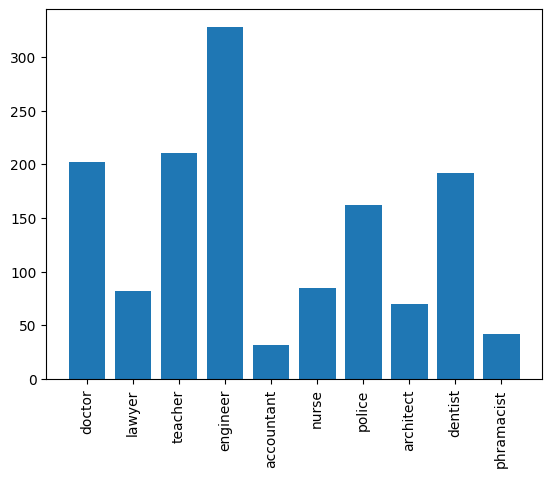

In [5]:
out1 = []
out2 = []
out3 = []
res=[]

for i in data['INP']:
    out1.append(matching_word(i,1))
    out2.append(matching_word(i,2))
    out3.append(matching_word(i,3))

data['Cosine Method']  = out1
data['Jaccard Method']  = out2
data['Levenshtein Method']  = out3

for i in range(data.shape[0]):     #Genarating Final Result Based On Majorty Of the Result
    x = list(data.loc[i])
    if x.count(x[0])>1:
        res.append(x[0])
    elif x.count(x[1])>1:
        res.append(x[1])
    else:
        res.append(x[2])

data['Result'] = res

count = []                          #List Containing Count Of every Occupation
for i in occupations:
    count.append(res.count(i))

print(count)

plt.bar(occupations,count)           #Generating An Bargrapgh of the Count Vs Occupation 
plt.xticks(rotation = 'vertical')
plt.show()